In [1]:
using Formatting
using StatsBase
using FFTW
using Plots

In [10]:
  I_cau1 = [
    5 0 0 1 2
    2 1 5 1 2
    7 1 5 1 2
    7 4 5 4 3
    7 1 6 1 3
  ]

  hist = fit(Histogram, reshape(I_cau1, (length(I_cau1))), nbins=8).weights
  normalized_hist = hist ./ sum(hist)
  cumsum_normalized_hist = cumsum(normalized_hist)

  println("Histogram normalized")
  println(normalized_hist)
  println("Cumsum Histogram normalized")
  println(cumsum_normalized_hist)

  prefered_hist = fit(Histogram, 0:7, nbins=8).weights
  normalized_prefered_hist = prefered_hist ./ sum(prefered_hist)
  cumsum_normalized_prefered_hist = cumsum(normalized_prefered_hist)

  println("Prefered Histogram")
  println(normalized_prefered_hist)
  println("Cumsum Prefered Histogram")
  println(cumsum_normalized_prefered_hist)

  # https://dsp.stackexchange.com/questions/16166/histogram-matching-of-two-images-using-cdf
  out_hist = zeros(8)
  out_color = zeros(8)

  for i in 1:length(out_color)
    for k in 1:length(cumsum_normalized_prefered_hist)
      if cumsum_normalized_prefered_hist[k] - cumsum_normalized_hist[i] < 0
        continue
      end
      out_hist[i] = cumsum_normalized_prefered_hist[k]
      out_color[i] = k
      break
    end
  end

  println("out hist")
  println(out_hist)
  println("out color")
  println([i for i=0:7])
  println(out_color)

  for idx in CartesianIndices(I_cau1)
    newcolor = out_color[I_cau1[idx] + 1]
    I_cau1[idx] = newcolor
  end

  display(I_cau1)
  println()
  hist = fit(Histogram, reshape(I_cau1, (length(I_cau1))), nbins=8).weights
  normalized_hist = hist ./ sum(hist)
  cumsum_normalized_hist = cumsum(normalized_hist)

  println("New Histogram")
  println(hist)
  println("New Histogram normalized")
  println(normalized_hist)
  println("New Cumsum Histogram normalized")
  println(cumsum_normalized_hist)


Histogram normalized


5×5 Array{Int64,2}:
 7  1  1  3  5
 5  3  7  3  5
 8  3  7  3  5
 8  6  7  6  5
 8  3  8  3  5

[0.08, 0.28, 0.16, 0.08, 0.08, 0.16, 0.04, 0.12]
Cumsum Histogram normalized
[0.08, 0.36, 0.52, 0.6, 0.68, 0.84, 0.88, 1.0]
Prefered Histogram
[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
Cumsum Prefered Histogram
[0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]
out hist
[0.125, 0.375, 0.625, 0.625, 0.75, 0.875, 1.0, 1.0]
out color
[0, 1, 2, 3, 4, 5, 6, 7]
[1.0, 3.0, 5.0, 5.0, 6.0, 7.0, 8.0, 8.0]

New Histogram
[2, 0, 7, 0, 6, 2, 4, 4]
New Histogram normalized
[0.08, 0.0, 0.28, 0.0, 0.24, 0.08, 0.16, 0.16]
New Cumsum Histogram normalized
[0.08, 0.08, 0.36, 0.36, 0.6, 0.68, 0.84, 1.0]


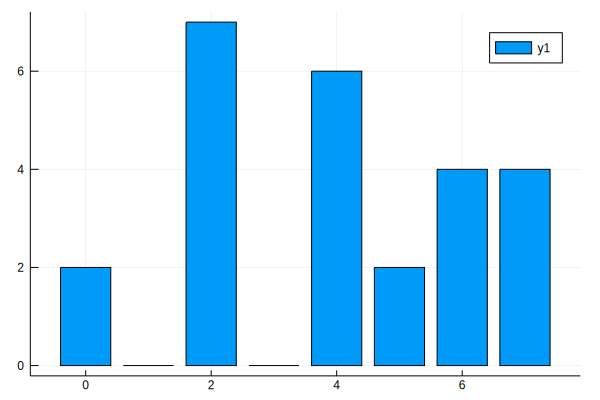

In [18]:
# h = fit(Histogram, reshape(I_cau1, (length(I_cau1))), nbins=8)
bar(0:length(hist)-1, hist)

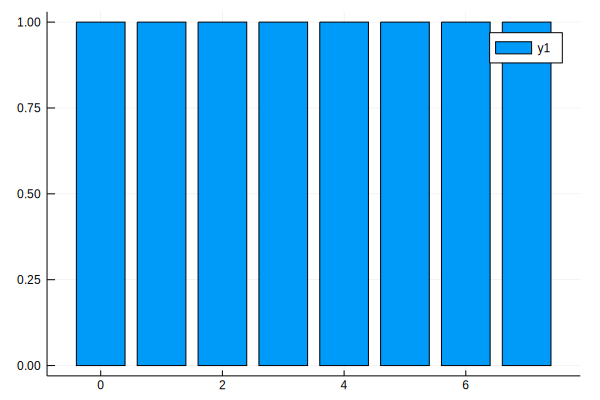

In [19]:
bar(0:length(prefered_hist)-1, prefered_hist)